# P2: 泰坦尼克号数据集探索

## 1. 数据集简介

本数据集包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。以下说明参考了[Kaggle](https://www.kaggle.com/c/titanic/data)网站

+ Survived: 生存否 0=No, 1=Yes
+ Pclass: 乘客舱位等级(头等舱、二等舱、三等舱) 1=1st, 2=2nd, 3=3rd
+ Name: 姓名
+ Sex: 性别
+ Age: 年龄
+ SibSp: 船上的 兄弟姐妹／配偶 人数
+ Parch: 船上的 父母／子女 人数
+ Ticket: 船票编号
+ Fare: 票价
+ Cabin: 客舱编号
+ Embarked: 登船地点 C=Cherbourg Q=Queenstown S=Southampton

In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

df = pd.read_csv("titanic_data.csv",index_col = False)
df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 问题：有哪些因素会让船上的人生还率更高？

问题中的因变量是生还率，定义为**样本的生还人数／样本的总人数**。由定义可知，生还率实际是样本内生还人数的均值。

自变量是影响生还率的因素，可能包括

+ 性别
+ 阶层（舱位等级）
+ 年龄
+ 亲情（船上的亲人数量）
+ 财力 (票价)
+ 船上位置（客舱）
+ 群体（登船地点）

...

下面对部分自变量和因变量的关系进行探索。

## 3. 探索数据集

总体是2224名乘客，样本是有数据的891名乘客。

### 3.1 性别和生还率的关系

#### 3.1.1 描述统计量

从原始数据集中提取性别和生还人数，按照性别进行分组统计。

In [469]:
def group_overview(df,group_name):
    group_df = df[['Survived']].groupby(df[group_name])
    print "****** Count ******"
    print group_df.count()
    print "****** Mean ******"
    print group_df.mean()
    print "****** Standard Deviation ******"
    print group_df.std()
    print "****** Variance ******"
    print group_df.var()
    return group_df

In [470]:
sex_group = group_overview(df,'Sex')

****** Count ******
        Survived
Sex             
female       314
male         577
****** Mean ******
        Survived
Sex             
female  0.742038
male    0.188908
****** Standard Deviation ******
        Survived
Sex             
female  0.438211
male    0.391775
****** Variance ******
        Survived
Sex             
female  0.192029
male    0.153488


样本891人
+ 女性314人，生还率均值0.74，标准偏差0.44，方差0.19
+ 男性577人，生还率均值0.19，标准偏差0.39，方差0.15

#### 3.1.2 推断统计量

零假设：女性生还率不高于男性生还率

$$ H_0: \mu_f \leq \mu_m $$

对立假设：女性生还率高于男性生还率

$$ H_a: \mu_f > \mu_m $$

独立样本t检验。根据假设，单尾检验，正方向。

$$ \alpha = 0.001 $$

描述统计量

$$ \bar{X}_f = 0.74, n_f = 314, SD_f = 0.44, SS_f = 0.19 $$

$$ \bar{X}_m = 0.19, n_m = 577, SD_m = 0.39, SS_m = 0.15$$

自由度

$$ df_f = n_f - 1 = 313, df_m = n_m -1 = 576 $$

合并方差

$$ S_{p}^{2} = \frac{SS_f + SS_m}{df_f + df_m} = \frac{0.19 + 0.15}{313 + 576}= 0.0003825 $$

标准误差

$$ SE = \sqrt{\frac{S_{p}^{2}}{n_f} + \frac{S_{p}^{2}}{n_m}} = \sqrt{\frac{0.0003825}{314} + \frac{0.0003825}{577}} = 0.0014 $$

$$ t_{statistic} = \frac{\bar{X}_f- \bar{X}_m}{SE} = 393 $$

对于 $$\alpha = 0.001 $$

t临界值

$$ t_{critical} = 3.098 $$

由t统计量可知，应该拒绝零假设，女性生还率远高于男性生还率，(双尾) P < 0.0001 。

### 3.2 阶级（舱位等级）和生还率的关系

#### 3.2.1 描述统计量

从原始数据集中提取舱位等级和生还人数，按照性别进行分组统计。

In [471]:
pclass_group = group_overview(df,'Pclass')

****** Count ******
        Survived
Pclass          
1            216
2            184
3            491
****** Mean ******
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
****** Standard Deviation ******
        Survived
Pclass          
1       0.484026
2       0.500623
3       0.428949
****** Variance ******
        Survived
Pclass          
1       0.234281
2       0.250624
3       0.183998


样本891人
+ 头等舱216人，生还率0.63，标准偏差0.48，方差0.23
+ 二等舱184人，生还率0.47，标准偏差0.50，方差0.25
+ 三等舱491人，生还率0.24，标准偏差0.43，方差0.18

#### 3.2.2 推断统计量

零假设：头等舱乘客生还率不高于二等舱乘客生还率

$$ H_0: \mu_1 \leq \mu_2 $$

对立假设：头等舱乘客生还率高于二等舱乘客生还率

$$ H_a: \mu_1 > \mu_2 $$

独立样本t检验。根据假设，单尾检验，正方向。

$$ \alpha = 0.001 $$

同 3.1.2 可得

$$ SE = 0.0034 $$

$$ t_{statistic} = 47 $$

对 $$ \alpha = 0.001, t_{critical} = 3.098 $$

应拒绝零假设，倾向于接受头等舱乘客生还率高于二等舱乘客生还率，(双尾) P < 0.0001 。

### 3.3 　年龄和生还率的关系

In [472]:
age_and_survived_df = df[['Survived','Age']].dropna()

有年龄纪录的乘客714人，平均年龄（单位：岁，下同）为29.70，最小年龄为0.42，最大年龄为80。年龄的第一四分位数为20，中位数为28，第三四分位数为38。

In [473]:
age_and_survived_df.describe()

,Survived,Age
count,714.000000,714.000000
mean,0.406162,29.699118
std,0.491460,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


将乘客年龄按10年一段分组，新增一列称为“AgeGroups”

In [474]:
def age_group(age):
    if age >=70:
        return '7'
    elif age >=60:
        return '6'
    elif age >=50:
        return '5'
    elif age >=40:
        return '4'
    elif age >=30:
        return '3'
    elif age >=20:
        return '2'
    elif age >=10:
        return '1'
    else:
        return '0'    

In [475]:
age_and_survived_df['AgeGroups'] = age_and_survived_df['Age'].apply(age_group)

In [476]:
age_groups = group_overview(age_and_survived_df,'AgeGroups')

****** Count ******
           Survived
AgeGroups          
0                62
1               102
2               220
3               167
4                89
5                48
6                19
7                 7
****** Mean ******
           Survived
AgeGroups          
0          0.612903
1          0.401961
2          0.350000
3          0.437126
4          0.382022
5          0.416667
6          0.315789
7          0.142857
****** Standard Deviation ******
           Survived
AgeGroups          
0          0.491062
1          0.492715
2          0.478057
3          0.497523
4          0.488635
5          0.498224
6          0.477567
7          0.377964
****** Variance ******
           Survived
AgeGroups          
0          0.241142
1          0.242768
2          0.228539
3          0.247529
4          0.238764
5          0.248227
6          0.228070
7          0.142857


+ 0: 0-10岁 62人，生还率0.61，标准偏差0.49， 方差0.24
+ 1: 10-20岁 102人，生还率0.40，标准偏差0.49， 方差0.24
+ 2: 20-30岁 220人，生还率0.35，标准偏差0.47， 方差0.23
+ 3: 30-40岁 167人，生还率0.43，标准偏差0.50， 方差0.25
+ 4: 40-50岁 89人，生还率0.38，标准偏差0.49， 方差0.23
+ 5: 50-60岁 48人，生还率0.41，标准偏差0.50， 方差0.25
+ 6: 60-70岁 19人，生还率0.31，标准偏差0.48， 方差0.23
+ 7: 70-80岁 7人，生还率0.14，标准偏差0.38， 方差0.14

生还率最高的是0-10岁的儿童，其次是30-40岁的壮年人，生还率最低的是70-80岁的老人。

## 3.4 亲人数量和生还率的关系

定义亲人数量 FamilyMembers = SibSp + Parch，新增一列称为“FamilyMembers”

In [477]:
family_members_and_survived_df = df[['Survived','SibSp','Parch']].dropna()

In [478]:
family_members_and_survived_df['FamilyMembers'] = family_members_and_survived_df['SibSp'] + family_members_and_survived_df['Parch']

In [479]:
family_group = group_overview(family_members_and_survived_df,'FamilyMembers')

****** Count ******
               Survived
FamilyMembers          
0                   537
1                   161
2                   102
3                    29
4                    15
5                    22
6                    12
7                     6
10                    7
****** Mean ******
               Survived
FamilyMembers          
0              0.303538
1              0.552795
2              0.578431
3              0.724138
4              0.200000
5              0.136364
6              0.333333
7              0.000000
10             0.000000
****** Standard Deviation ******
               Survived
FamilyMembers          
0              0.460214
1              0.498756
2              0.496249
3              0.454859
4              0.414039
5              0.351250
6              0.492366
7              0.000000
10             0.000000
****** Variance ******
               Survived
FamilyMembers          
0              0.211797
1              0.248758
2              0.

+ 船上亲人数量（不包括自己）最少为0人，最多为10人。
+ 单身登船的人数为537人，占全部891人的60.27%。这部分人的生还率为0.30
+ 船上有29个人的家庭成员总数为4人(FamilyMembers = 3)，这些人的生还率最高，为0.72
+ 船上亲人数量超过7个人的有13人，这些人无人生还。

# 4. 结论

+ 女性乘客的生还率高于男性乘客

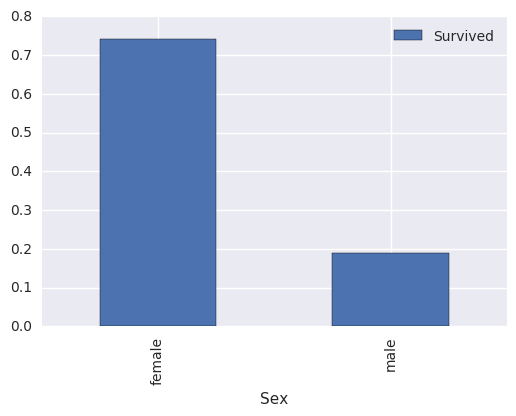

In [480]:
sex_group.mean().plot(kind='bar')

+ 高等级舱位的生还率高于低等级舱位的生还率

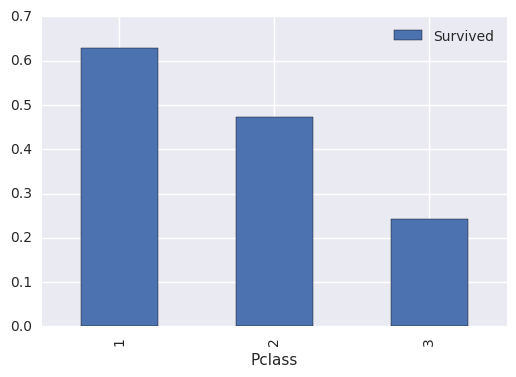

In [481]:
pclass_group.mean().plot(kind='bar')

+ 0-10岁儿童生还率高于其他人群生还率
+ 70岁以上老人生还率低于其他人群生还率

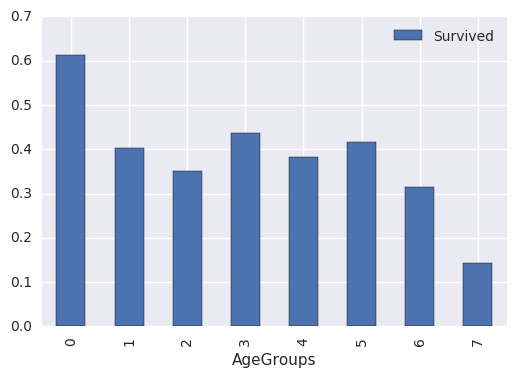

In [482]:
age_groups.mean().plot(kind='bar')

+ 船上亲人数量在1-3人的乘客生还率高于其他人群的生还率
+ 船上亲人数量 >7人的乘客无人生还

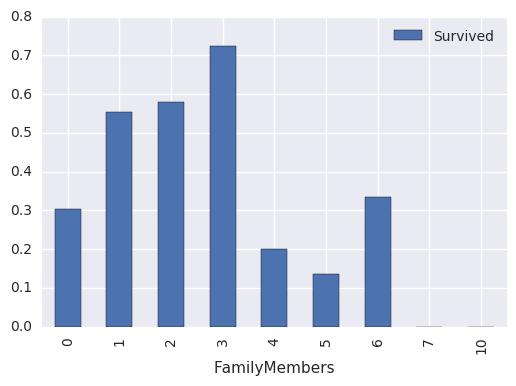

In [483]:
family_group.mean().plot(kind='bar')